### Problem Statement
Our task is to predict median house values in Californian districts, given a number of features from these districts.
Aim of this study is to determine;
*Framing the problem
*Selecting correct and most suitable algorithm
*Evaluating the model through performance measures
*Validatig the model

### Dataset
Dataset is based on data from the 1990 California census.

In [1]:
# First importing key libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading data

In [3]:
data_housing=pd.read_csv('housing.csv')

In [4]:
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Each row represents one district. There are 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value and ocean_proximity

### Getting to know data

In [5]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


With this given data and our problem statement, it can confirmed that we will use **supervised learning** task for this given problem.We can see that data has labeled training examples,each has the expected output i.e median housing price.
Additionally, we will use **regression method** to predict value. As there are more than one independent variables so, we ll use multivariate regression hence, system will use multiple features to make a prediction.

In [6]:
# Find out what categories exist
# and how many districts belong to each category by using the value_counts() method

data_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Use this for categorical variables. Numerical variables will not be very suitable here.

In [7]:
# Let's look at the other fields.
# The describe() method shows a summary of the numerical attributes

data_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


25%, 50%, 75% shows the corresponding percentiles  
Points to Note:  
**25th percentile** is called 1st quartile  - 25% of the districts have a housing_median_age lower than 18.   
**50th percentile** is called median - 50% of the districts have a housing_median_age lower than 29.   
**75th percentile** is called 3rd quartile - 75% of the districts have a housing_median_age lower than 37.

In [8]:
# for checking a single variable
data_housing.population.head()

0     322.0
1    2401.0
2     496.0
3     558.0
4     565.0
Name: population, dtype: float64

In [9]:
# to view some row 
data_housing.iloc[20638]

longitude            -121.32
latitude               39.43
housing_median_age        18
total_rooms             1860
total_bedrooms           409
population               741
households               349
median_income         1.8672
median_house_value     84700
ocean_proximity       INLAND
Name: 20638, dtype: object

### Some practice with iloc, loc
Selecting data by row numbers (.iloc)

In [10]:
data_housing.iloc[0]# for 1st row

longitude              -122.23
latitude                 37.88
housing_median_age          41
total_rooms                880
total_bedrooms             129
population                 322
households                 126
median_income           8.3252
median_house_value      452600
ocean_proximity       NEAR BAY
Name: 0, dtype: object

In [11]:
data_housing.iloc[1] # second row 

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [12]:
data_housing.iloc[-1] # last row

longitude            -121.24
latitude               39.37
housing_median_age        16
total_rooms             2785
total_bedrooms           616
population              1387
households               530
median_income         2.3886
median_house_value     89400
ocean_proximity       INLAND
Name: 20639, dtype: object

In [13]:
data_housing.iloc[[2,5,7]] # for comination of row

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [14]:
data_housing.iloc[:4] # for 1st 4 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [15]:
data_housing.iloc[4:] # from 5th row uptill end of datapoint. If you add (4:,9) It will show values of 5th row to end of data giving 
# column number values.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY


In [16]:
data_housing.iloc[:,0] # 1st column

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
5       -122.25
6       -122.25
7       -122.25
8       -122.26
9       -122.25
10      -122.26
11      -122.26
12      -122.26
13      -122.26
14      -122.26
15      -122.26
16      -122.27
17      -122.27
18      -122.26
19      -122.27
20      -122.27
21      -122.27
22      -122.27
23      -122.27
24      -122.27
25      -122.28
26      -122.28
27      -122.28
28      -122.28
29      -122.28
          ...  
20610   -121.56
20611   -121.55
20612   -121.56
20613   -121.55
20614   -121.54
20615   -121.54
20616   -121.53
20617   -121.53
20618   -121.55
20619   -121.56
20620   -121.48
20621   -121.47
20622   -121.44
20623   -121.37
20624   -121.41
20625   -121.52
20626   -121.43
20627   -121.32
20628   -121.48
20629   -121.39
20630   -121.32
20631   -121.40
20632   -121.45
20633   -121.53
20634   -121.56
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length:

In [17]:
data_housing.iloc[:,-1] # last column 

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
6        NEAR BAY
7        NEAR BAY
8        NEAR BAY
9        NEAR BAY
10       NEAR BAY
11       NEAR BAY
12       NEAR BAY
13       NEAR BAY
14       NEAR BAY
15       NEAR BAY
16       NEAR BAY
17       NEAR BAY
18       NEAR BAY
19       NEAR BAY
20       NEAR BAY
21       NEAR BAY
22       NEAR BAY
23       NEAR BAY
24       NEAR BAY
25       NEAR BAY
26       NEAR BAY
27       NEAR BAY
28       NEAR BAY
29       NEAR BAY
           ...   
20610      INLAND
20611      INLAND
20612      INLAND
20613      INLAND
20614      INLAND
20615      INLAND
20616      INLAND
20617      INLAND
20618      INLAND
20619      INLAND
20620      INLAND
20621      INLAND
20622      INLAND
20623      INLAND
20624      INLAND
20625      INLAND
20626      INLAND
20627      INLAND
20628      INLAND
20629      INLAND
20630      INLAND
20631      INLAND
20632      INLAND
20633      INLAND
20634     

In [18]:
 data_housing.population.iloc[2] # For variable population

496.0

In [19]:
 data_housing.iloc[0:5] # first five rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
 data_housing.iloc[:, 0:2] # first two columns of data  with all rows

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
5,-122.25,37.85
6,-122.25,37.84
7,-122.25,37.84
8,-122.26,37.84
9,-122.25,37.84


In [21]:
 data_housing.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.

,longitude,population,households
0,-122.23,322.0,126.0
3,-122.25,558.0,219.0
6,-122.25,1094.0,514.0
24,-122.27,1006.0,422.0


In [22]:
 data_housing.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data

,population,households,median_income
0,322.0,126.0,8.3252
1,2401.0,1138.0,8.3014
2,496.0,177.0,7.2574
3,558.0,219.0,5.6431
4,565.0,259.0,3.8462


**Selecting data by label or by a conditional statment (.loc)**

In [23]:
 data_housing.loc[497] # fetching data by index number

longitude              -122.27
latitude                 37.85
housing_median_age          52
total_rooms               4076
total_bedrooms             920
population                1800
households                 815
median_income           2.7054
median_house_value      182300
ocean_proximity       NEAR BAY
Name: 497, dtype: object

In [24]:
data_housing.loc[497,['total_rooms','ocean_proximity']] # fetching data by index with certain column names

total_rooms            4076
ocean_proximity    NEAR BAY
Name: 497, dtype: object

### Plotting

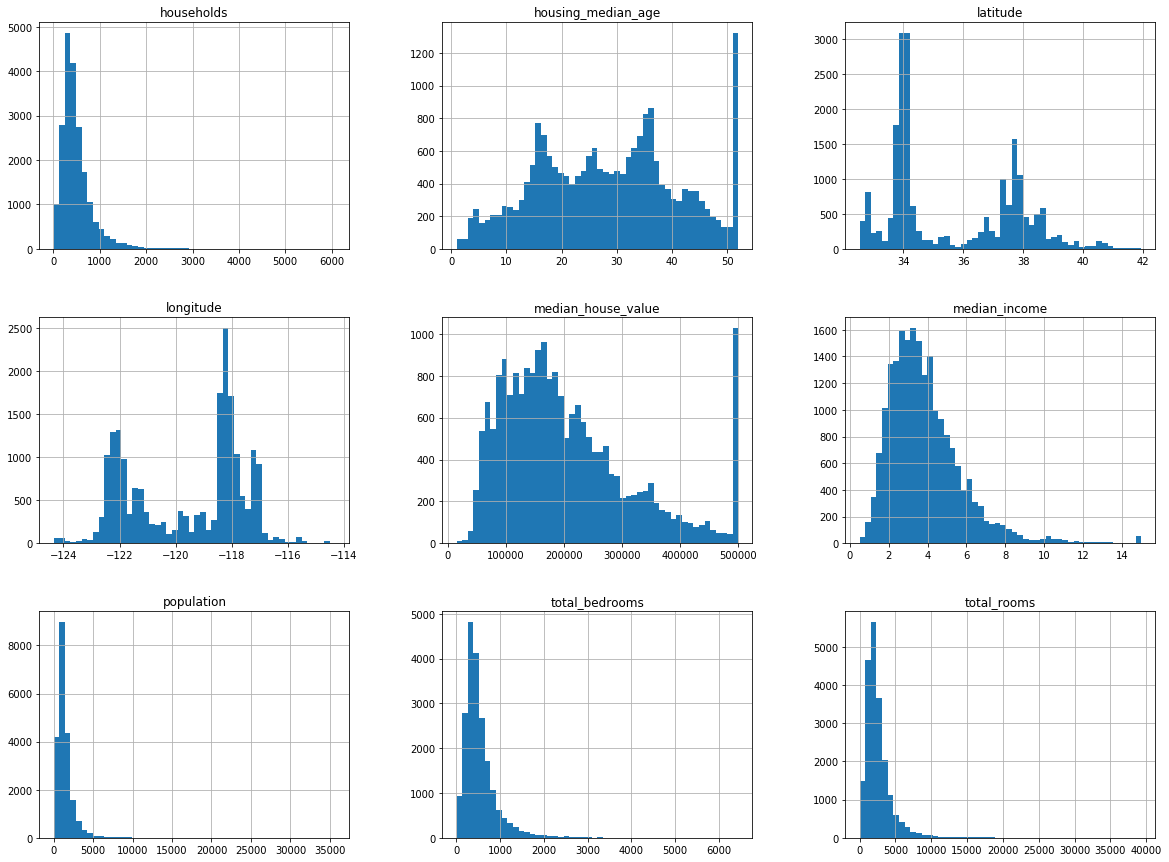

In [25]:

# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres. Histogram is frequency of data within certain range.

%matplotlib inline
import matplotlib.pyplot as plt
data_housing.hist(bins=50, figsize=(20,15))
plt.show()

 **About the histogram:**   
 A histogram is used for continuous data, where the bins represent ranges of data.To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable

**About Results:**  
From above histograms it's clear that most of the features are skewed. It seems that **'housing_median_age'** and **'median_housing_value'** have been capped a the end (Peak at the end).
We can also see that 'population','total_bedrooms','total_rooms' are **right skewed** meaning that there is big tail on right side. We need to transform this tail based data to bell shaped distribution i.e normal distribution. 

### Creating test dataset

In [26]:
#To make this notebook's output identical at every run
#we are going to set a seed for random number.we will use random numbers and these random are kind of pseudo random numbers 
#if the said seed is same the random number will always be the same. So if two users set the same seed, they will get the 
#same random number.
#in short, seed is the basis on which the random number is generated
np.random.seed(42)

In [27]:
#split test function is defined here.  For A train test function, it takes it takes the input data set and it takes a ratio and
#returns it returns the the splitted data .Sklearn has train_test_split()

def split_train_test(data, test_ratio):
    np.random.seed(42) # to keep same permutation all the time 
    shuffled_indices = np.random.permutation(len(data)) #it takes a number as argument and prepares a permutation
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] #iloc shows rows as given below in example
# Also we are returing a tuple.

train_set, test_set = split_train_test(data_housing, 0.2) # 80%, 20% rule for training and testing data
len(train_set), "train +", len(test_set), "test"

#in the end, we have not changed existing data. We have made new copy of records for our analysis


(16512, 'train +', 4128, 'test')

### Underlying Problem
If we add more records to this defined function , it will not work. In fact it will break if we tend to fetch more data 
into current dataset. Actual values will shift from its position even if we add very datapoints. Practically, datasets tend to
evolve over time and hence, we cannot remain on one dataset forever hence, upgrating is part of data science.
Solution: What if we could identify whole dataset with something and based on that identifier , record is picked up.Hence, record will have set of data in both test and training by using unique and immutable identifier.
Another way is to persist the test data and train data separately and append new data proportionally proportionally to each.

In [28]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = data_housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

print(len(train_set), "train +", len(test_set), "test")

16362 train + 4278 test


In [29]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


### Other simpler and quicker way is to use sklearn

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_housing, test_size=0.2, random_state=42) # this random state will avoid sample bias.

print(len(train_set), "train &", len(test_set), "test")
# issue of stooping biasing will remain with this train_test_split function. Though it is easier ready made function but, it does
#not contain id. As one can make his/her own function with identifier. 


16512 train & 4128 test


In [31]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [32]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


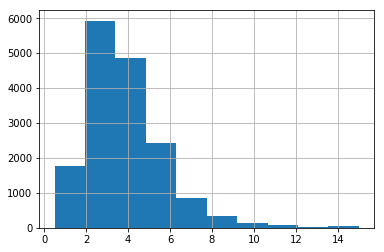

In [33]:
#checking histogram
train_set["median_income"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001732276C128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017322B3CD30>]], dtype=object)

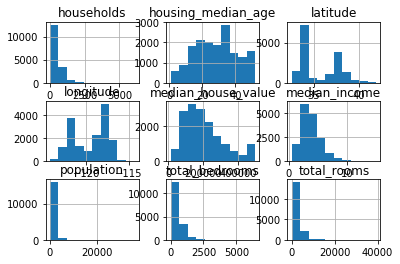

In [34]:
# Like above, we can see all variables as well
train_set.hist()

As this seems bit over lapping so, we better see each one individually. Or improve bin size and plt command

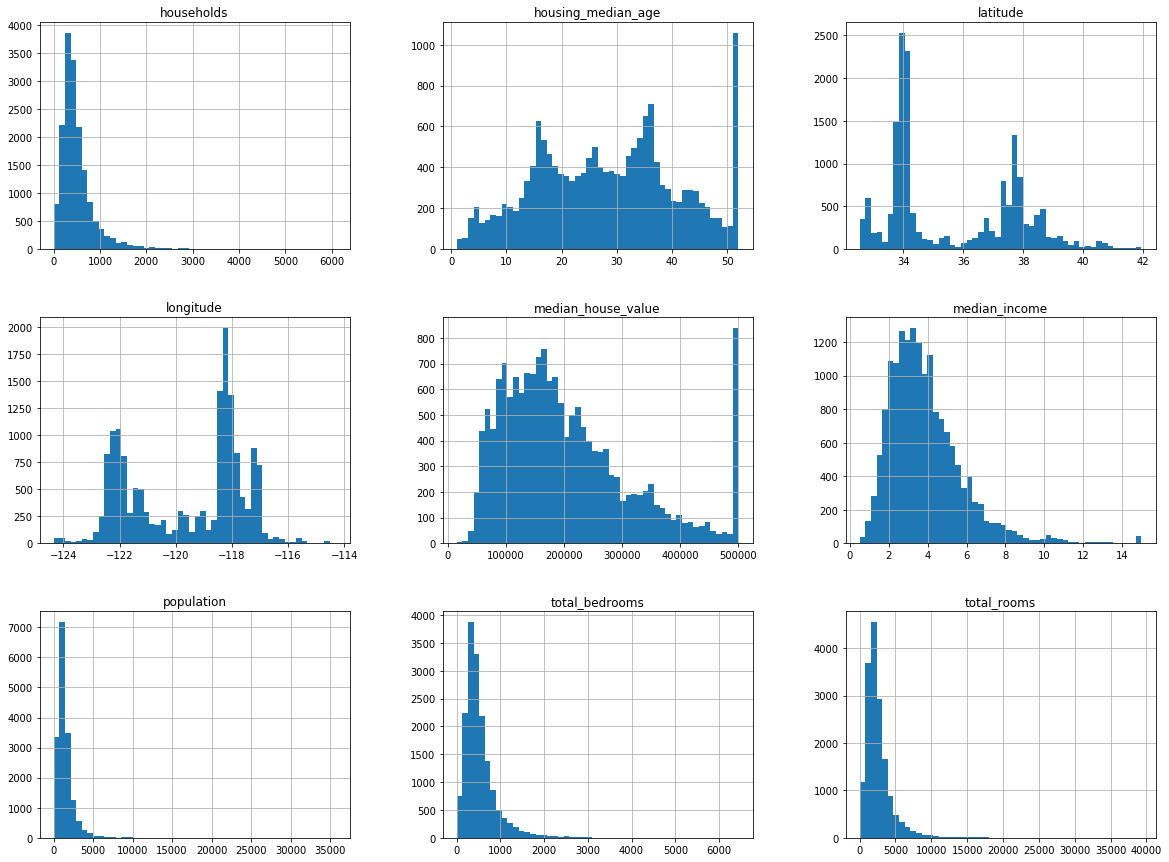

In [35]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

Compare this with original data. And there is not much difference due to 80% of data pick 

### Sample Bias being taken care of
Sample bias is a big problem in data science. Sampling bias is a bias in which a sample is collected in such a way that some members of the intended population are less likely to be included than others.
There are three ways to avoid it
**a)Simple random sample SRS
b)Stratified sample
c)Cluster Sample**

In [36]:
# For our sample , we ll use stratfied sample
# First of all, we ll consider median_income as one of main independent variable that has an effect on house price.
#Therefore let's draw histogram to see how it looks

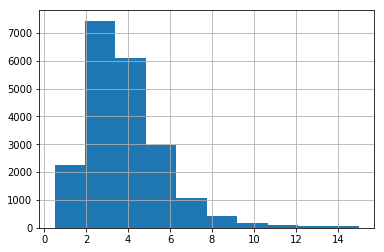

In [37]:
# Create a histrogram of median income

data_housing["median_income"].hist()

This histogram shows a right skewed graph. Also it shows income on x-axis and number of people on y-axis. It shows that main sample lies betwwen 2-6 income group.So, it is much saturated there. There are far values of 12 and 14 points. These can be taken as outliers. We need to remove or reduce impact of such outliers

In [38]:
# Divide by 1.5 to limit the number of income categories. Hence x-axis will be reduced.
# Round up using ceil to have discrete categories so that it will give next larger e.g value. np.Ceil(1.5)=2
data_housing["income_cat"] = np.ceil(data_housing["median_income"] / 1.5)

In [39]:
data_housing["income_cat"].value_counts() # now it is significantly reduced and concentrated on values.

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

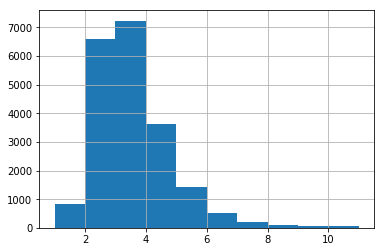

In [40]:
data_housing["income_cat"].hist()

We can see now that x-axis values i.e income has actually narrowed to 10 from 15. Graph is still right skewed however that skewedness has been reduced.

In [41]:
# Label those above 5 as 5.0
data_housing["income_cat"].where(data_housing["income_cat"] < 5, 5.0, inplace=True)

In [42]:
data_housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

Data seems to be more concentrated now. Lets again see histogram

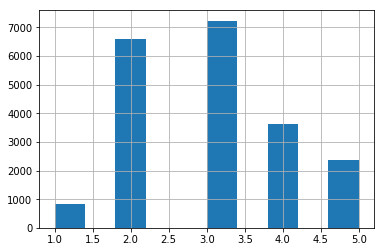

In [43]:
data_housing["income_cat"].hist()

As we can see data seems normally distributed and much better than previous skewed data.

### Making test and train data with stratfied income variable

In [44]:
# Stratified Sampling using Scikit-learn's StratifiedShuffleSplit Class
from sklearn.model_selection import StratifiedShuffleSplit

In [45]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data_housing,data_housing['income_cat']): # split function will produce list of tuples
#Additionally, split generates location of records and using location we may access actual data.
    strat_train_set=data_housing.loc[train_index]
    strat_test_set=data_housing.loc[test_index]

In [46]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [47]:
# creating train and test set files for further use 
strat_train_set.to_csv("strat_train_set.csv",index=False) 
strat_test_set.to_csv("strat_test_set.csv",index=False)

### Exploratory Data Analysis

In [48]:
# From here, we ll use original data as "data_housing" and our new training data as "data_train"
#if training data is large then we would use sample training set. As our data is not that large so we ll use full data.
data_train=pd.read_csv('strat_train_set.csv')

In [49]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [50]:
data_train.shape

(16512, 10)

Text(0.5,1,'Distribution of households')

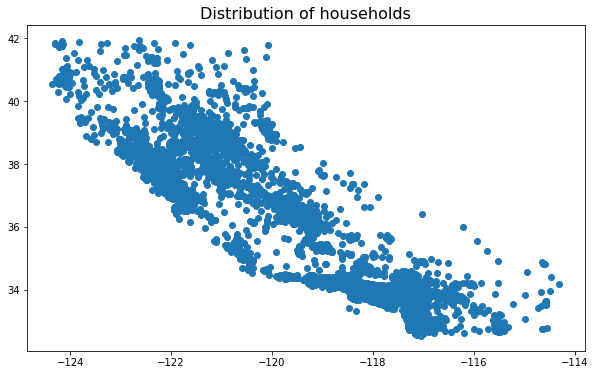

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(x=data_train['longitude'],y=data_train['latitude'])
plt.title("Distribution of households",size=16)

From here we cannot see density of graph


Text(0.5,1,'Distribution of households')

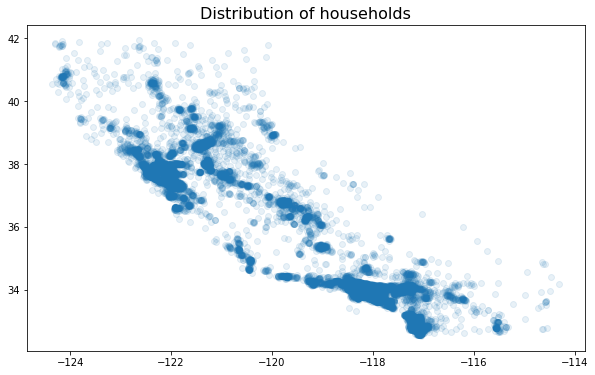

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(x=data_train['longitude'],y=data_train['latitude'],alpha=0.1) # aplha shows density of 10%
plt.title("Distribution of households",size=16)

Above graph is more close to heat map where values with thicker blue color shows a higher density and less translucent blue area shows low density. However; it is no heat map. To create a better explaination of heat map, lets work with more variables and attributes.

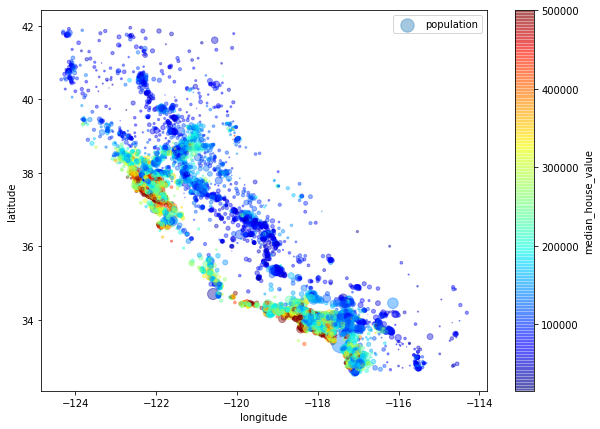

In [53]:
# take s as size for , c for color
data_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data_train["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

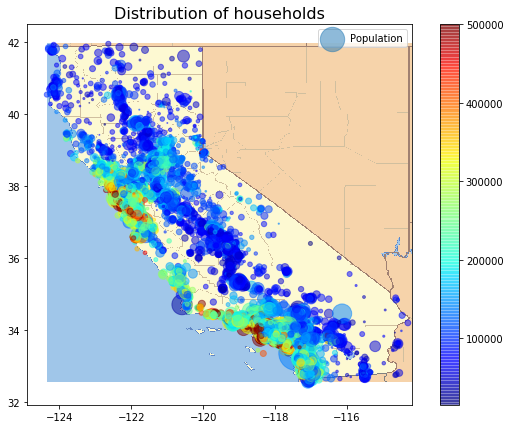

In [54]:
# Now take exact value in number and add california map in graph as well
plt.figure(figsize=(10,7))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95]) # extent=[horizontal_min,horizontal_max,vertical_min,vertical_max]
# OR extent=[longitude_top_left,longitude_top_right,latitude_bottom_left,latitude_top_left]

plt.scatter(x=data_train['longitude'],y=data_train['latitude'],alpha=0.5,s=data_train['population']/30,c=data_train['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

Radius of each circle represents distriction population i.e s
Color represents price i.e C
By using predefined color map (option cmap), we come up with jet that ranges from blue(low value) to red(higher price value)
From given graph we observe that ;
**Bigger the circle, higher is popultaion. Housing prices are much related to location and population density. So, house price is high in more dense areas.
Housing prices near shore are higher except in northern california.Hence, it is difficult by only this plot to rule out if there is any relation between price and ocean proximity.**

In [55]:
corr_matrix=data_train.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [56]:
# As our dependent variable is housing price so lets see how it is related to other attributes/variables 
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

It shows that median income is only variable that is somewhat correlated. Other values are too low. total rooms and age are positive but, values are very low i.e 0.13 and 0.11.One idea is not to look at magnitude at this stage, only check if there is positive or negative correlation. For example, latitide shows a negative correlation with house value. We have observed in above plot that those areas near northern coast have less price so, it shows a negative relation. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000173223DC550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000173233AA978>]], dtype=object)

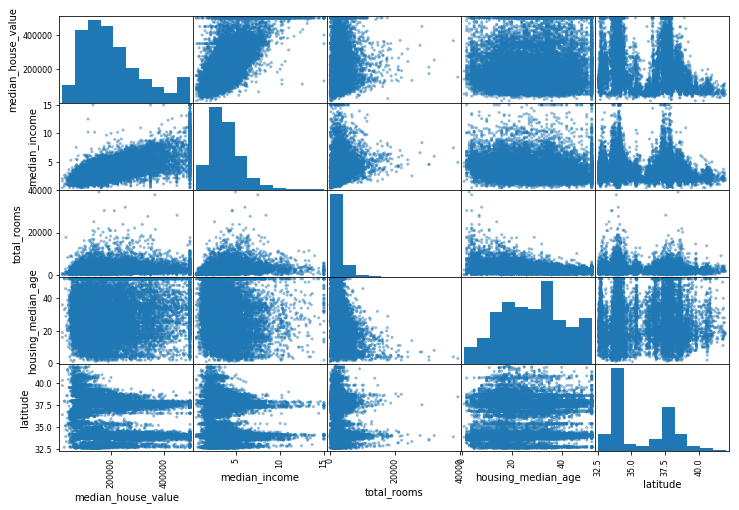

In [57]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age","latitude"]
scatter_matrix(data_train[attributes], figsize=(12, 8))

Out of all scatter plots, it is tough to find any kind of relation. Only median income and median house value make ay sense and show a sign of increasing linear trend.Latitude does not provide much sense either.It seems only valueable relation is between house value and income exists. This approach is useful in finding patterns in data and it confirms that correlation value and its direction. 

[0, 16, 0, 550000]

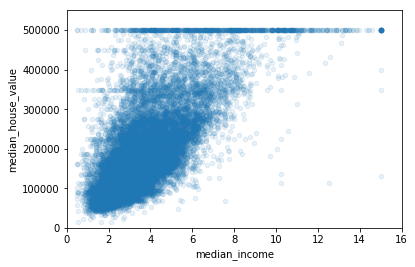

In [58]:
data_train.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

This graph shows a linear relation as value of x increases then y would also increase. However; at 500 k there is a cap in data.
Similar capped lines can be seen around 450k,350k. This kind of data may degrade the performance of model. 

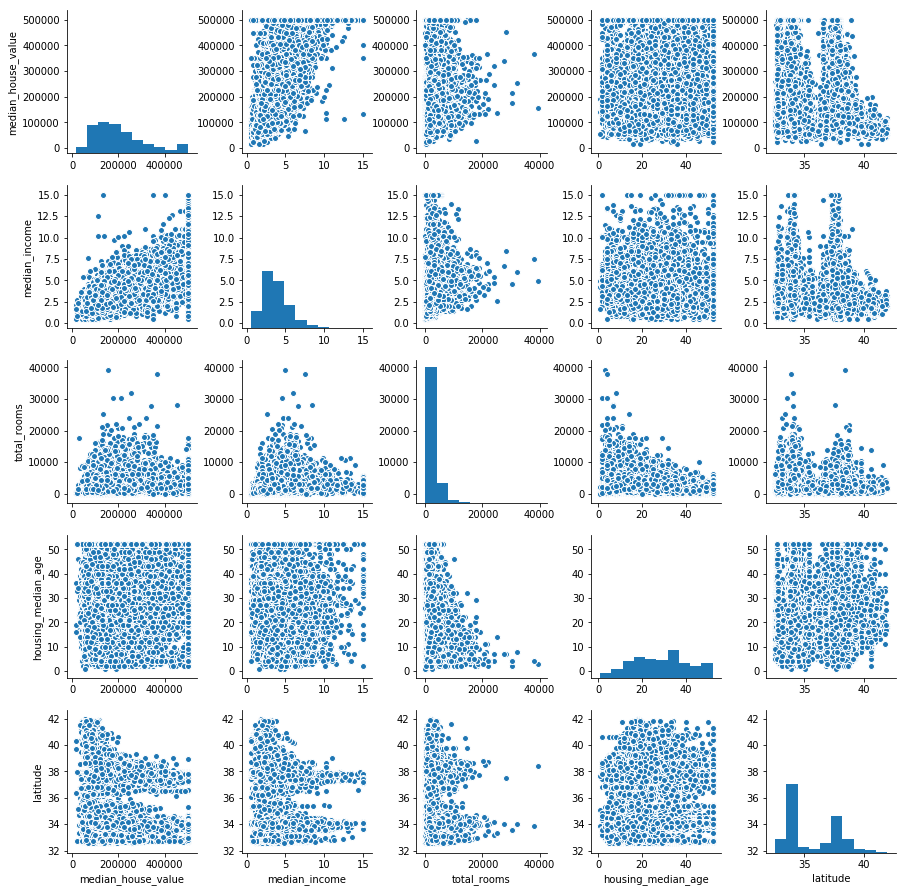

In [59]:
# Pairplot does same thing as scatter matrix. It uses sns so , it is useful to know also
sns.pairplot(data_train[['median_house_value','median_income','total_rooms','housing_median_age','latitude']])

### Adding new features:
As we can see that 'total number of rooms' is not a useful variable. It does not have any relation with our dependent variable. But, how about if we could find something interesting to do with it. Hence, we will use 'rooms per household'. Similary, we ll create two other attributes i.e bedroom per room and population per household.

In [60]:
# Attribute Combinations of rooms per household,bedrooms per room,population per household
data_new_features=data_train.copy()

In [61]:
data_new_features['rooms_per_household']=data_new_features['total_rooms']/data_new_features['households']
data_new_features['bedrooms_per_room']=data_new_features['total_bedrooms']/data_new_features['total_rooms']
data_new_features['population_per_household']=data_new_features['population']/data_new_features['households']

In [62]:
data_new_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


There are three new attributes added.

In [63]:
corr_matrix=data_new_features.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [64]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

It is clear that **rooms_per_household** and **bedrooms_per_room** have better correlation with **median_house_value** than their original variables **total_rooms** and **total_bedrooms**.Although direction of relation is negative. 

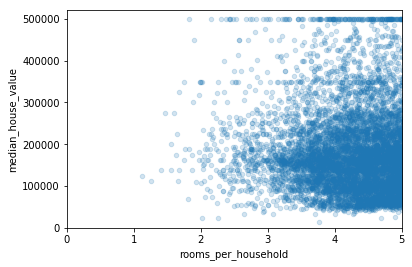

In [65]:
data_new_features.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

This plot shows that density of observations are is higher as our x variable increases. So, it shows a negative relation with house value.As noticing, it is does not show a linear pattern i.e by increasing "rooms per household" variable we will see a decrease in "house value". It only shows a higher density at higher values of our independent vqariable (rooms per household). This only means that our data is left skewed but, it is difficult to deduce any relationship from this scatter plot. In short, this negative corelation is not clear enough and value of 0.25 is not high enough to give any clear picture. 
There are also capped points in data as we can see on 4000000 and 5000000. These points can be seen as outliers.

### Data cleaning

In [70]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


From this info , we can see that all variables in our dataset have 16512 values except total_bedrooms. It contains 16354 hence, there are 207 **missing values**

In [76]:
# We need to see those points where we get missing/Null values. We check 1st 5. We may check all as well.
data_null = data_train[data_train.isnull().any(axis=1)].head() # using isnull() function
data_null

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
113,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,175000.0,<1H OCEAN
116,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN
216,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,287100.0,<1H OCEAN
303,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,INLAND
321,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,191000.0,<1H OCEAN


Good thing is that we can see what are the data points where our variable has missing values. So, we do not need to inspect null values at random. As we know the points and places where there are missing values, it is much easier to address the problem. Now, its time to find solution for this problem

**Solution 1 **
Get rid of those districts where total_bedrooms has missing values i.e rows 
Use function dropna()


In [82]:
data_option1=data_null.dropna(subset=["total_bedrooms"])
data_option1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


As a result of dropna(), we have zero missing values now. so our data with null values is empty. We could use this on our training data and see if we succeed in removing all null values

In [83]:
data_clean_option1=data_train.dropna(subset=["total_bedrooms"])
data_clean_option1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [84]:
#lets check if there are any missing values in data
data_clean_option1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16354 non-null float64
latitude              16354 non-null float64
housing_median_age    16354 non-null float64
total_rooms           16354 non-null float64
total_bedrooms        16354 non-null float64
population            16354 non-null float64
households            16354 non-null float64
median_income         16354 non-null float64
median_house_value    16354 non-null float64
ocean_proximity       16354 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


As we can see now there are all variables contain same amount of values. So, no missing values. we have got rid of missing data rows. However those rows might contains some useful information and is also lost

**Solution 2 ** 
Get rid of whole attribute i.e column of total_bedrooms
Use drop()

In [86]:
data_option2=data_null.drop("total_bedrooms", axis=1)
data_option2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
113,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,175000.0,<1H OCEAN
116,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,264400.0,<1H OCEAN
216,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,287100.0,<1H OCEAN
303,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,95800.0,INLAND
321,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,191000.0,<1H OCEAN


As we have removed entire column, so there is no missing value. But, this might be even worse as we have lost an entire attribute and all those values might be useful.This may effect our analysis later. So, we need a better solution instead of removing these values. We rather wish to keep rows or columns.

**Solution 3 **
Set given values with missing data with some values(zero, mean, median)
Use fillna()

In [101]:
median = data_housing["total_bedrooms"].median()
median

435.0

In [103]:
data_null["total_bedrooms"].fillna(median, inplace=True)
data_null.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
113,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,175000.0,<1H OCEAN
116,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,264400.0,<1H OCEAN
216,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,287100.0,<1H OCEAN
303,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,95800.0,INLAND
321,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,191000.0,<1H OCEAN


All those missing values do have median values now. By this, we didnt miss any of useful data.

In [ ]:
#Ge​data_traint number of Null Values
def get_null_count(data_train):
    for i in data_train.columns:
        print(i,': ',len(data_train[data_train[i].isnull()][i]))

In [ ]:
get_null_count(data_train)

We can see that "total bedrooms" is the only variable that has non-null values. It means that there are missing values only in this variable. It could be seen in above display when "descible ()" was run. There were some missing value in total_bedrooms variable. We need to fix this problem.